In [1]:
%load_ext autoreload
%autoreload 2

The test that compares two different ways of enumerating products in `tests/test_dist_enum.py`.

In [2]:
from pathlib import Path

import contextily as ctx
import matplotlib.pyplot as plt
import pandas as pd
from pandas.testing import assert_frame_equal
from tqdm import tqdm

from dist_s1_enumerator.mgrs_burst_data import (
    get_burst_ids_in_mgrs_tiles,
    get_burst_table,
    get_mgrs_tile_table_by_ids,
)

In [3]:
mgrs_tile_id = '45QZE'
track_numbers = [114]

In [4]:
delta_window_days = 365 
delta_lookback_days = 0
max_pre_imgs_per_burst = 10

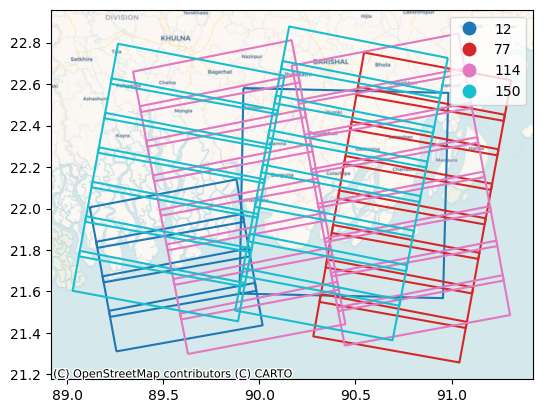

In [5]:
fig, ax = plt.subplots()

df_mgrs = get_mgrs_tile_table_by_ids(mgrs_tile_id)
df_mgrs.boundary.plot(ax=ax)
burst_ids = get_burst_ids_in_mgrs_tiles(mgrs_tile_id)
df_burst = get_burst_table(burst_ids)
df_burst_plot = df_burst.copy()
df_burst_plot['track_number'] = df_burst_plot.jpl_burst_id.map(lambda bid: int(bid.split('-')[0][1:]))
df_burst_plot['geometry'] = df_burst.geometry.exterior
df_burst_plot.plot(column='track_number', categorical=True, legend=True, ax=ax)
ctx.add_basemap(ax,
                crs=df_mgrs.crs.to_string(),
                source=ctx.providers.CartoDB.Voyager
                )

# Example test

In [6]:
from dist_s1_enumerator.asf import get_rtc_s1_ts_metadata_from_mgrs_tiles
from dist_s1_enumerator.dist_enum import enumerate_dist_s1_products, enumerate_one_dist_s1_product

In [7]:
df_ts = get_rtc_s1_ts_metadata_from_mgrs_tiles(mgrs_tile_id, track_numbers=[114])
df_ts.head()

,opera_id,jpl_burst_id,acq_dt,acq_date_for_mgrs_pass,polarizations,track_number,pass_id,url_crosspol,url_copol,geometry,mgrs_tile_id,acq_group_id_within_mgrs_tile,track_token
0,OPERA_L2_RTC-S1_T114-242839-IW2_20220104T12041...,T114-242839-IW2,2022-01-04 12:04:16+00:00,2022-01-04,VV+VH,114,487,https://datapool.asf.alaska.edu/RTC/OPERA-S1/O...,https://datapool.asf.alaska.edu/RTC/OPERA-S1/O...,"POLYGON ((90.44671 21.33325, 91.34869 21.49206...",45QZE,2,114
1,OPERA_L2_RTC-S1_T114-242840-IW1_20220104T12041...,T114-242840-IW1,2022-01-04 12:04:18+00:00,2022-01-04,VV+VH,114,487,https://datapool.asf.alaska.edu/RTC/OPERA-S1/O...,https://datapool.asf.alaska.edu/RTC/OPERA-S1/O...,"POLYGON ((89.63018 21.29865, 90.50011 21.45612...",45QZE,2,114
2,OPERA_L2_RTC-S1_T114-242840-IW2_20220104T12041...,T114-242840-IW2,2022-01-04 12:04:19+00:00,2022-01-04,VV+VH,114,487,https://datapool.asf.alaska.edu/RTC/OPERA-S1/O...,https://datapool.asf.alaska.edu/RTC/OPERA-S1/O...,"POLYGON ((90.41258 21.4998, 91.31563 21.65847,...",45QZE,2,114
3,OPERA_L2_RTC-S1_T114-242841-IW1_20220104T12042...,T114-242841-IW1,2022-01-04 12:04:21+00:00,2022-01-04,VV+VH,114,487,https://datapool.asf.alaska.edu/RTC/OPERA-S1/O...,https://datapool.asf.alaska.edu/RTC/OPERA-S1/O...,"POLYGON ((89.59507 21.46527, 90.46605 21.62265...",45QZE,2,114
4,OPERA_L2_RTC-S1_T114-242841-IW2_20220104T12042...,T114-242841-IW2,2022-01-04 12:04:22+00:00,2022-01-04,VV+VH,114,487,https://datapool.asf.alaska.edu/RTC/OPERA-S1/O...,https://datapool.asf.alaska.edu/RTC/OPERA-S1/O...,"POLYGON ((90.37848 21.66609, 91.28262 21.82463...",45QZE,2,114


In [9]:
data_dir = Path('rtc_s1_ts_metadata')
data_dir.mkdir(exist_ok=True, parents=True)
df_ts.to_parquet(data_dir / f'mgrs{mgrs_tile_id}__track{track_numbers[0]}.parquet')

In [10]:
df_products = enumerate_dist_s1_products(df_ts, [mgrs_tile_id])
df_products.head()

Enumerating by MGRS tiles: 100%|█████████████████| 1/1 [00:00<00:00, 11.52it/s]


,opera_id,jpl_burst_id,acq_dt,acq_date_for_mgrs_pass,polarizations,track_number,pass_id,url_crosspol,url_copol,geometry,mgrs_tile_id,acq_group_id_within_mgrs_tile,track_token,input_category,product_id
0,OPERA_L2_RTC-S1_T114-242839-IW2_20240728T12042...,T114-242839-IW2,2024-07-28 12:04:24+00:00,2024-07-28,VV+VH,114,643,https://datapool.asf.alaska.edu/RTC/OPERA-S1/O...,https://datapool.asf.alaska.edu/RTC/OPERA-S1/O...,"POLYGON ((90.44827 21.33357, 91.35021 21.49235...",45QZE,2,114,pre,0
1,OPERA_L2_RTC-S1_T114-242840-IW1_20240728T12042...,T114-242840-IW1,2024-07-28 12:04:26+00:00,2024-07-28,VV+VH,114,643,https://datapool.asf.alaska.edu/RTC/OPERA-S1/O...,https://datapool.asf.alaska.edu/RTC/OPERA-S1/O...,"POLYGON ((89.63174 21.29924, 90.50162 21.45668...",45QZE,2,114,pre,0
2,OPERA_L2_RTC-S1_T114-242840-IW2_20240728T12042...,T114-242840-IW2,2024-07-28 12:04:27+00:00,2024-07-28,VV+VH,114,643,https://datapool.asf.alaska.edu/RTC/OPERA-S1/O...,https://datapool.asf.alaska.edu/RTC/OPERA-S1/O...,"POLYGON ((90.4142 21.49987, 91.31721 21.65851,...",45QZE,2,114,pre,0
3,OPERA_L2_RTC-S1_T114-242841-IW1_20240728T12042...,T114-242841-IW1,2024-07-28 12:04:29+00:00,2024-07-28,VV+VH,114,643,https://datapool.asf.alaska.edu/RTC/OPERA-S1/O...,https://datapool.asf.alaska.edu/RTC/OPERA-S1/O...,"POLYGON ((89.59664 21.46587, 90.46757 21.62322...",45QZE,2,114,pre,0
4,OPERA_L2_RTC-S1_T114-242841-IW2_20240728T12043...,T114-242841-IW2,2024-07-28 12:04:30+00:00,2024-07-28,VV+VH,114,643,https://datapool.asf.alaska.edu/RTC/OPERA-S1/O...,https://datapool.asf.alaska.edu/RTC/OPERA-S1/O...,"POLYGON ((90.38005 21.66642, 91.28416 21.82493...",45QZE,2,114,pre,0


In [11]:
df_post = df_products[df_products.input_category == 'post'].reset_index(drop=True)
data = zip(df_post.product_id.tolist(), df_post.acq_date_for_mgrs_pass.tolist())
unique_data = list(set(data))
unique_data = sorted(unique_data, key=lambda d: d[1])
product_ids, post_dates = zip(*unique_data)
post_dates[:3]


('2023-11-07', '2023-11-19', '2023-12-01')

In [12]:
for product_id, post_date in tqdm(unique_data):
    df_one_product = enumerate_one_dist_s1_product(mgrs_tile_id, 
                                                   track_number=114, 
                                                   post_date=pd.Timestamp(post_date))
    df_one_product_alt = df_products[df_products.product_id == product_id].reset_index(drop=True).drop(columns='product_id')
    df_pre_alt = df_one_product_alt[df_one_product_alt.input_category == 'pre'].reset_index(drop=True) 
    df_post_alt = df_one_product_alt[df_one_product_alt.input_category == 'post'].reset_index(drop=True)

    df_pre = df_one_product[df_one_product.input_category == 'pre'].reset_index(drop=True)
    df_post = df_one_product[df_one_product.input_category == 'post'].reset_index(drop=True)

    assert_frame_equal(df_pre, df_pre_alt, atol=1e-7)
    assert_frame_equal(df_post, df_post, atol=1e-7)
    break

  0%|                                                   | 0/32 [00:31<?, ?it/s]
